## Regularized Logistic Regression

In the second part of this exercise, logistic regression algorithm from part one will be improved by adding a regularization term. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.optimize as opt
# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})
%matplotlib inline

##  Loading and Visualizing Data

In [2]:
directory = os.getcwd() + '/ex2data2.txt'
data = pd.read_csv(directory,header=None, names=['Test 1', 'Test 2', 'Accepted'])

cols =  data.shape[1]
y = data.iloc[:,-1:cols]
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


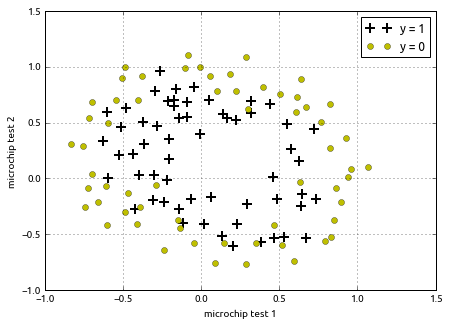

In [3]:
accepted = data[data['Accepted'] == 1]
not_accepted = data[data['Accepted'] == 0]
plt.figure(figsize=(7,5))
plt.plot(accepted['Test 1'],accepted['Test 2'],'k+',label = 'y = 1',ms=10,mew=2)
plt.plot(not_accepted['Test 1'],not_accepted['Test 2'],'yo', label = 'y = 0', ms=6,mew=.3)
plt.grid()
plt.xlabel('microchip test 1')
plt.ylabel('microchip test 2')
plt.legend()

## Adding Polynomial Features

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly =PolynomialFeatures(degree=6,interaction_only=False,include_bias=True)
X = pd.DataFrame(poly.fit_transform(data[['Test 1','Test 2']]))
# poly.powers_

X.head()
# notice that X has already bias terms

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193



## Cost Function

In [5]:
def sigmoid(x):
    '''
    J = SIGMOID(z) computes the sigmoid of z.
    '''
    return 1/(1+np.exp(-x))

def costFunctionReg(theta, X, y, lambda_):
    '''
    J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters. 
    '''
    m,n = X.shape
    X = np.array(X)
    y = np.array(y)
    h = sigmoid(X.dot(theta))
    reg = lambda_/(2.*m)*(theta.T.dot(theta))
    J = -(y.T.dot(np.log(h))+(1-y).T.dot(np.log(1.-h)))*1./m + reg
    return J

In [6]:
# initialize fitting parameters
m , n = X.shape
initial_theta = np.zeros(n)

# Set regularization parameter lambda to 1
lambda_ = 1

# cost with inital thetas
cost = costFunctionReg(initial_theta, X, y, lambda_)
print 'Cost at initial theta (zeros): {}'.format(cost)


Cost at initial theta (zeros): [ 0.69314718]


## Gradient


In [14]:
def gradient(theta, X, y, lambda_):
    '''
    grad = gradient(theta, X, y, lambda) computes the 
    gradient of the cost w.r.t. to the parameters. 
    '''
    m,n = X.shape
    y = np.matrix(y)
    X = np.matrix(X)
    theta = np.matrix(theta)
    h = sigmoid(X.dot(theta.T))
    grad = X.T*(h-y)
    
    z = np.zeros(n) 
    z[1:]=1 
    reg = lambda_*(np.multiply(theta,z).T)
    
    grad = (grad + reg)/m
    return grad

## Optimization algoritm

In [12]:
result = opt.fmin_tnc(func=costFunctionReg, x0=initial_theta, fprime=gradient, args=(X, y, lambda_))
result

(array([ 1.25441471,  0.62276773,  1.1924277 , -2.00505529, -0.87290727,
        -1.36184266,  0.12573853, -0.3553685 , -0.35603634, -0.17096335,
        -1.45784635, -0.06683334, -0.61498631, -0.25080279, -1.18096032,
        -0.22566832, -0.20562889, -0.06382329, -0.27187029, -0.27658998,
        -0.46836026, -1.03247358,  0.01627584, -0.29695276,  0.00581071,
        -0.32631632, -0.12073387, -0.93023012]), 54, 4)

## Performance  of the Algoritm

In [13]:
def predict(theta,X):
    theta = np.matrix(theta)
    X = np.matrix(X)
    return (sigmoid(X*(theta.T))>=0.5).astype(int)

def accuracy(theta,X,y):
    return np.asscalar(sum(predict(theta,X) == y)/float(len(y)))*100

In [10]:
# trained theta
theta_min = np.matrix(result[0])

# compute trained accuracy
n = accuracy(theta_min,X,y)
print 'Train Accuracy: %{}'.format(n)


Train Accuracy: %83.0508474576
